In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import gym
from gym import spaces


class LawnMowerEnv(gym.Env):
    def __init__(self):
        super(LawnMowerEnv, self).__init__()
        self.action_space = spaces.Discrete(4)

        self.observation_space = spaces.Discrete(20)  

        # Environment specifics
        self.state = (0, 0)  # Start position
        self.grid_size = (4, 5)  # Grid dimensions
        self.goal_state = (3, 4)  # Goal position

        # Rewards
        self.rewards = {
            (2, 1): -25,  # Rock
            (2, 2): -25,  # Rock
            (3, 2): +10,  # Battery
            (3, 4): +20   # Goal
        }
        self.default_reward = -1

        # Load images
        self.agent_image = mpimg.imread('agent.png')  
        self.background_image = mpimg.imread('background.png')  
        self.goal_image = mpimg.imread('goal.png')  
        self.rock_image = mpimg.imread('obstacle.png') 
        
    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state

        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 2:  # Right
            y = min(self.grid_size[1] - 1, y + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)

        self.state = (x, y)
        reward = self.rewards.get(self.state, self.default_reward)
        terminated = self.state == self.goal_state

        return self.state, reward, terminated, {}

    def render(self, mode="human"):
        fig, ax = plt.subplots(figsize=(8, 6))

        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                ax.imshow(
                    self.background_image,
                    extent=[j, j + 1, self.grid_size[0] - i - 1, self.grid_size[0] - i],
                    zorder=0
                )

        for (x, y), reward in self.rewards.items():
            if reward < 0:  # Rock
                ax.imshow(
                    self.rock_image,
                    extent=[y, y + 1, self.grid_size[0] - x - 1, self.grid_size[0] - x],
                    zorder=1
                )
            elif reward > 0 and (x, y) != self.goal_state:  # Battery
                ax.imshow(
                    self.goal_image,
                    extent=[y, y + 1, self.grid_size[0] - x - 1, self.grid_size[0] - x],
                    zorder=1
                )

        goal_x, goal_y = self.goal_state
        ax.imshow(
            self.goal_image,
            extent=[goal_y, goal_y + 1, self.grid_size[0] - goal_x - 1, self.grid_size[0] - goal_x],
            zorder=1
        )

        # Draw the agent
        agent_x, agent_y = self.state
        ax.imshow(
            self.agent_image,
            extent=[agent_y, agent_y + 1, self.grid_size[0] - agent_x - 1, self.grid_size[0] - agent_x],
            zorder=2
        )

        ax.set_xticks(np.arange(self.grid_size[1]))
        ax.set_yticks(np.arange(self.grid_size[0]))
        ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

        plt.gca().invert_yaxis()  
        plt.show()



Initial State: (0, 0)


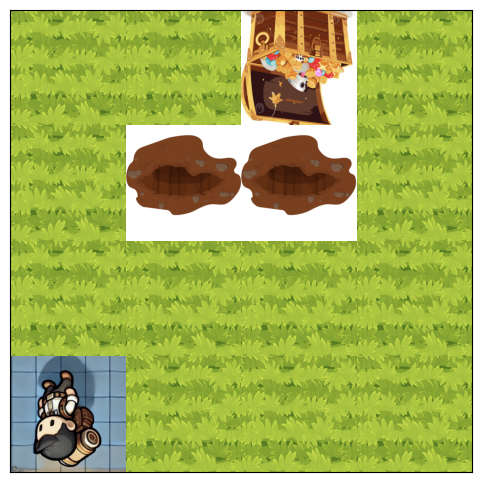

In [2]:
env = LawnMowerEnv()
initial_state = env.reset()
print(f"Initial State: {initial_state}")
env.render()

Starting Improved Random Agent...

Step 1:
Action: 3, State: (0, 0) -> Next State: (0, 0), Reward: -1


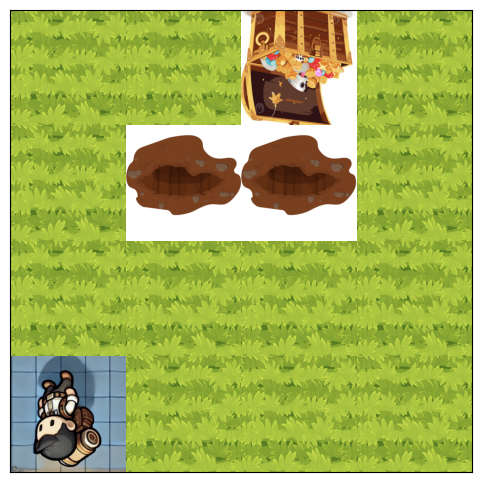

Step 2:
Action: 2, State: (0, 0) -> Next State: (0, 1), Reward: -1


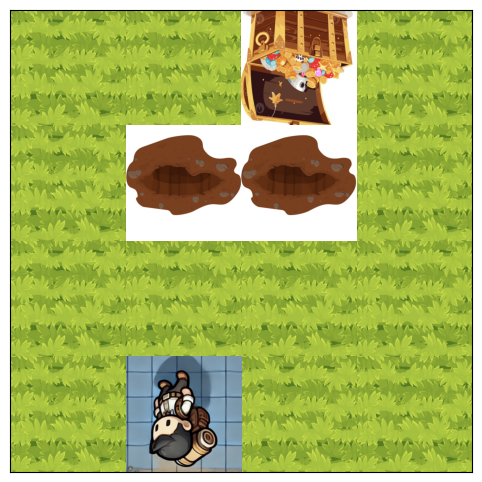

Step 3:
Action: 2, State: (0, 1) -> Next State: (0, 2), Reward: -1


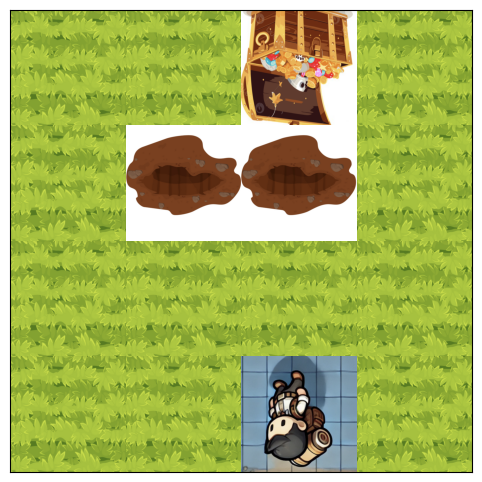

Step 4:
Action: 2, State: (0, 2) -> Next State: (0, 3), Reward: -1


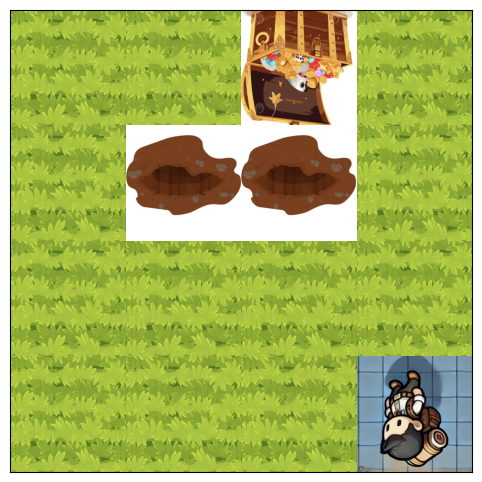

Step 5:
Action: 2, State: (0, 3) -> Next State: (0, 4), Reward: -1


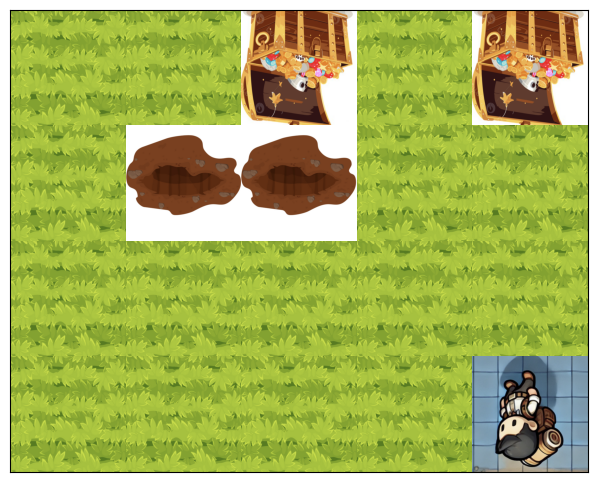

Step 6:
Action: 1, State: (0, 4) -> Next State: (1, 4), Reward: -1


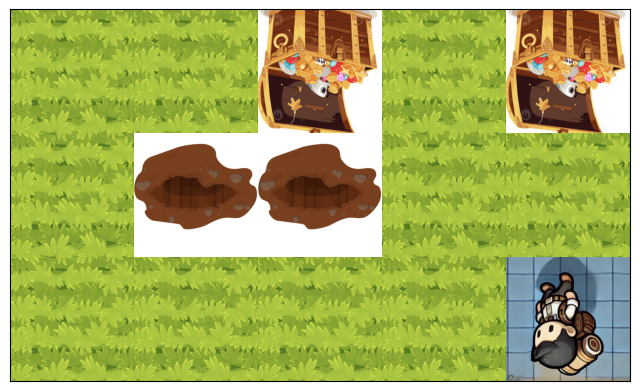

Step 7:
Action: 3, State: (1, 4) -> Next State: (1, 3), Reward: -1


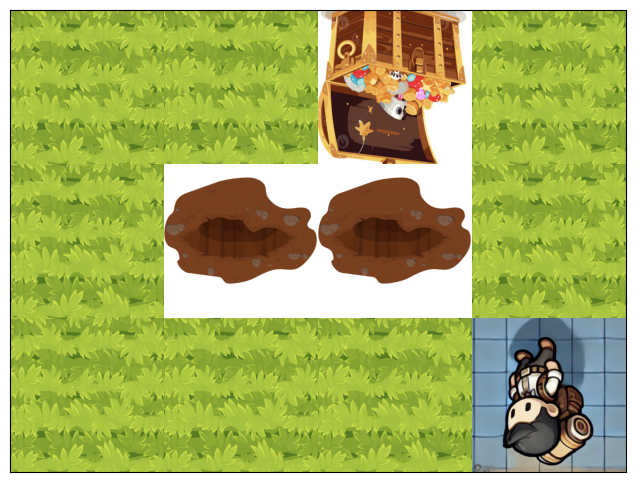

Step 8:
Action: 1, State: (1, 3) -> Next State: (2, 3), Reward: -1


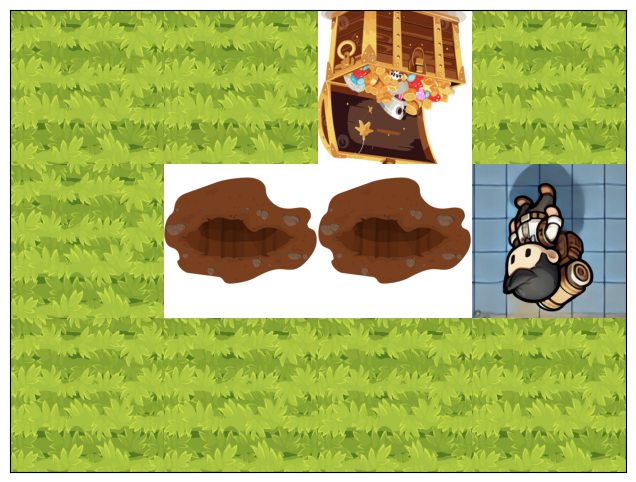

Step 9:
Action: 1, State: (2, 3) -> Next State: (3, 3), Reward: -1


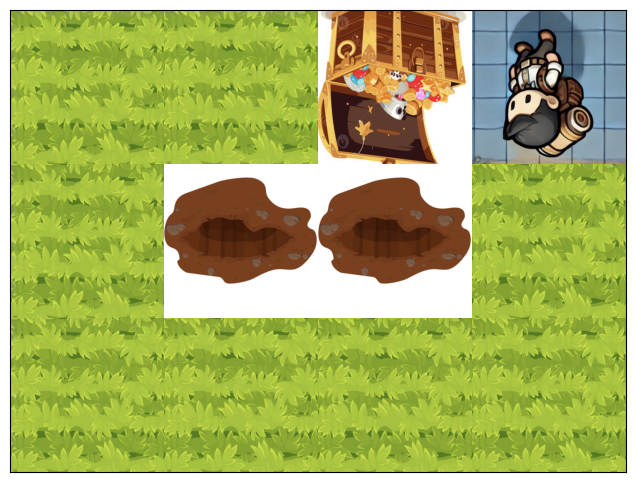

Step 10:
Action: 2, State: (3, 3) -> Next State: (3, 4), Reward: 20


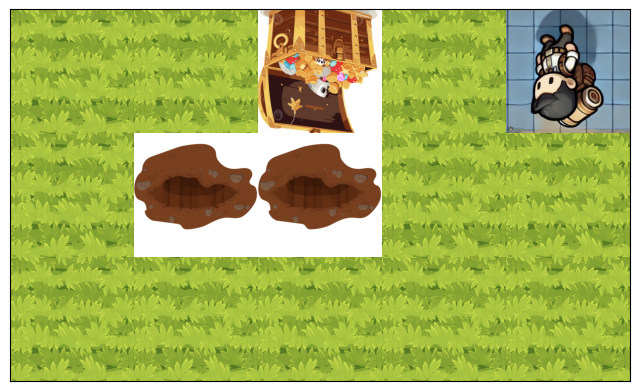

Goal reached in 10 steps with cumulative reward: 11


In [3]:
def random_agent(env, max_steps=10):
    state = env.reset()
    visited_states = set()  
    cumulative_reward = 0

    print("Starting Improved Random Agent...\n")

    for step in range(1, max_steps + 1):
        x, y = state  # Current state coordinates (row, column)

        # Determine possible actions and avoid previously visited states
        possible_actions = list(range(env.action_space.n))  # All possible actions
        unvisited_actions = []

        for action in possible_actions:
            # Simulate the action to determine the next state
            if action == 0 and (max(0, x - 1), y) not in visited_states:  # Up
                unvisited_actions.append(action)
            elif action == 1 and (min(env.grid_size[0] - 1, x + 1), y) not in visited_states:  # Down
                unvisited_actions.append(action)
            elif action == 2 and (x, min(env.grid_size[1] - 1, y + 1)) not in visited_states:  # Right
                unvisited_actions.append(action)
            elif action == 3 and (x, max(0, y - 1)) not in visited_states:  # Left
                unvisited_actions.append(action)

        
        if unvisited_actions:
            action = np.random.choice(unvisited_actions)
        else:
            action = np.random.choice(possible_actions)  # Fallback to any action if stuck


        next_state, reward, terminated, _ = env.step(action)
        visited_states.add(next_state)
        cumulative_reward += reward

        print(f"Step {step}:")
        print(f"Action: {action}, State: {state} -> Next State: {next_state}, Reward: {reward}")

        # Render the environment
        env.render()
        if terminated: 
            print(f"Goal reached in {step} steps with cumulative reward: {cumulative_reward}")
            break

        
        state = next_state

    if not terminated:
        print(f"\nAgent failed to reach the goal within {max_steps} steps.")
v = LawnMowerEnv()
random_agent(env, max_steps=10)
